In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import load_boston

C:\Users\sneha\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
boston = load_boston()

In [5]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### Visualisation 

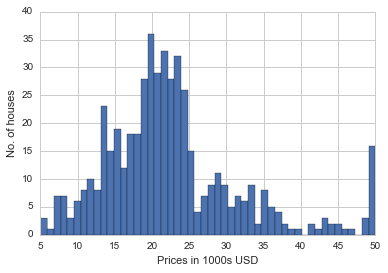

In [7]:
#visualization of data - histogram
plt.hist(boston.target, bins=50)
plt.xlabel("Prices in 1000s USD")
plt.ylabel("No. of houses")

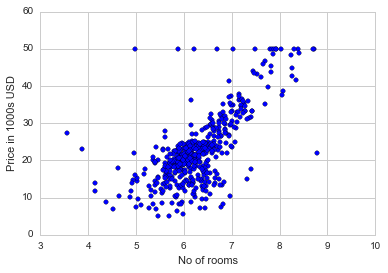

In [11]:
#scatter plot - one feature vs target

plt.scatter(boston.data[:,5], boston.target)
plt.ylabel('Price in 1000s USD')
plt.xlabel('No of rooms')

In [17]:
#transforming to pandas dataframe

boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['Price'] = boston.target

In [18]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


C:\Users\sneha\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


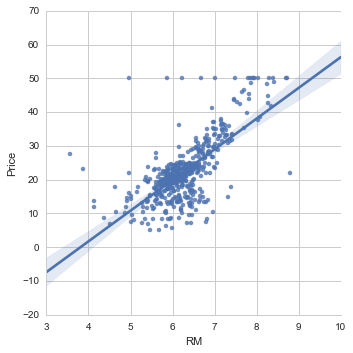

In [19]:
sns.lmplot('RM', 'Price', data=boston_df)

#### Using Numpy for a Univariate Linear Regression

In [23]:
X = np.vstack(boston_df.RM)
Y = boston_df.Price
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )

In [26]:
#getting best fits

m, b = np.linalg.lstsq(X, Y)[0]

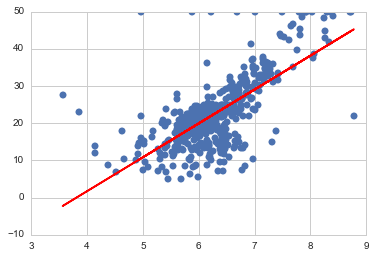

In [32]:
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

##### Getting the error 

In [33]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]

In [36]:
# Get the root mean square error
rmse = np.sqrt(error_total/len(X) )

print "The root mean squared error was %.2f " %rmse

The root mean squared error was 6.60 


##### scikit learn to implement a multivariate regression

In [37]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

In [38]:
lreg = LinearRegression()

In [40]:
X_multi = boston_df.drop('Price', axis = 1)
Y_target = boston_df.Price

In [41]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
print 'The estimaed intercept cofficient is %.2f' % lreg.intercept_
print 'The number of coefficients used was %d ' % len(lreg.coef_)

The estimaed intercept cofficient is 36.49
The number of coefficients used was 13 


In [43]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


##### Now let's move on to Predicting prices!
###### Using Training and Validation

In [45]:
# Grab the output and set as X and Y test and train data sets!
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,boston_df.Price)
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


(379L, 2L) (127L, 2L) (379L,) (127L,)


##### Predicting Prices

In [46]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)
print "Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2)
    
print "Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 45.11
Fit a model X_train, and calculate MSE with X_test and Y_test: 39.43


##### Residual Plots 

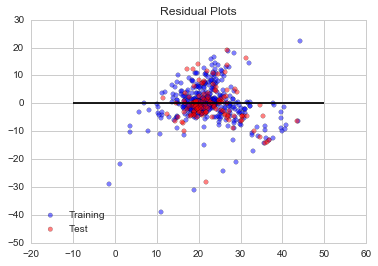

In [55]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')